Gradient descent is a optimization algorithm , which gives the best possible m & c values by minimizing the cost function.
Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.calculation speed is also high/computationaly cheaper.

# Gradien descent for single feature dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv(r"C:\Users\abhishek\Desktop\tvmarketing.csv")
x=np.array(list(df["TV"]))
y=np.array(list(df["Sales"]))

In [38]:
def costvsm(slopes,costs):
    plt.scatter(slopes,costs)
    plt.grid()
    plt.xlabel("slope")
    plt.ylabel("cost")

def step_gradient(x,y,m,c,learning_rate):
    points=len(x)
    msloped=0
    csloped=0
    for i in range(points):
        xi=x[i]
        yi=y[i]
        msloped+=(-2/points)*(yi-m*xi-c)*xi
        csloped+=(-2/points)*(yi-m*xi-c)
    mcorrected=m-learning_rate*msloped
    ccorrected=c-learning_rate*csloped
    return mcorrected,ccorrected

def costcalc(x,y,m,c):
    points=len(x)
    cost=0
    for i in range(points):
        xi=x[i]
        yi=y[i]
        cost+=(1/points)*((yi-m*xi-c)**2)
    return cost

def gd(x,y,learning_rate,iterations):
    m=0
    c=0
    slopes=[]
    costs=[]
    for i in range(iterations):
        m,c=step_gradient(x,y,m,c,learning_rate)
        cost=costcalc(x,y,m,c)
        costs.append(cost)
        slopes.append(m)
        print(cost)
    costvsm(slopes,costs)
    return m,c    

In [29]:
def run():
    learning_rate=0.00001
    iterations=100
    m,c=gd(x,y,learning_rate,iterations)
    print(m,c)

58.584943595592634
29.334425285846336
24.153051575792166
23.235148294505173
23.072451748656423
23.04352819982769
23.038300434616055
23.037270005863768
23.0369830703111
23.03682783394358
23.036695927073247
23.03656815371423
23.03644111359949
23.036314204425285
23.03618731950283
23.036060439933962
23.035933562371138
23.03580668622136
23.03567981137964
23.03555293782731
23.03542606556106
23.03529919458033
23.035172324884964
23.035045456474936
23.034918589350244
23.034791723510875
23.03466485895683
23.03453799568806
23.03441113370456
23.034284273006346
23.034157413593388
23.034030555465634
23.033903698623163
23.033776843065887
23.033649988793805
23.03352313580691
23.033396284105194
23.033269433688638
23.033142584557236
23.03301573671098
23.03288889014982
23.032762044873795
23.032635200882858
23.03250835817699
23.032381516756217
23.03225467662048
23.03212783776981
23.03200100020417
23.03187416392355
23.03174732892791
23.031620495217297
23.031493662791668
23.031366831650985
23.03124000179527

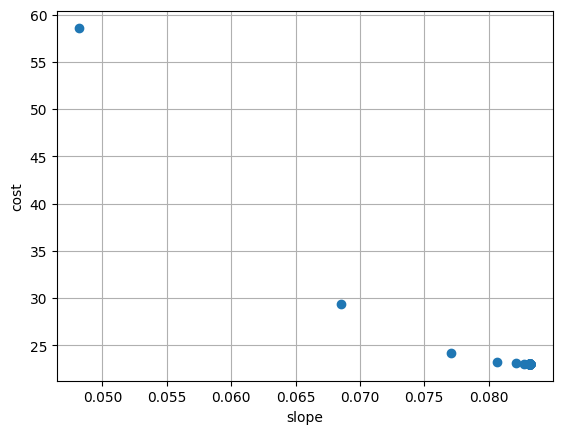

In [39]:
run()

# Generic gradient descent

In [7]:
data=datasets.load_boston() #data with n features
Scale = StandardScaler()
boston = Scale.fit_transform(data["data"])

C:\Users\abhishek\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

In [14]:
df=pd.DataFrame(boston,columns=data["feature_names"])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058


In [18]:
y=data["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:

def step_gradient(data,m,c,learning_rate):
    points=len(data["target"])
    msloped=0
    csloped=0
    for i in range(points):
        xi=data["data"][i].sum()
        yi=data["target"][i]
        msloped+=(-2/points)*(yi-m*xi-c)*xi
        csloped+=(-2/points)*(yi-m*xi-c)
    mcorrected=m-learning_rate*msloped
    ccorrected=c-learning_rate*csloped
    return mcorrected,ccorrected

def costcalc(data,m,c):
    points=len(data["target"])
    cost=0
    for i in range(points):
        xi=data["data"][i].sum()
        yi=data["target"][i]
        cost+=(1/points)*((yi-m*xi-c)**2)
    return cost

def gd(data,learning_rate,iterations):
    m=0
    c=0
    slopes=[]
    costs=[]
    for i in range(iterations):
        m,c=step_gradient(data,m,c,learning_rate)
        cost=costcalc(data,m,c)
        costs.append(cost)
        slopes.append(m)
        print(cost)
    #costvsm(slopes,costs)
    return m,c    

In [49]:


def step_gradient(df,y,m,c,learning_rate,points,features):
    msloped=np.zeros(features)
    csloped=np.zeros(features)
    for i in range(points):
        xi=np.array(list(df.iloc[i]))
        yi=y[i]
        for j in range(features):
            msloped[j]+=(-2/points)*(yi-(np.multiply(xi,m)+c).sum())*xi[j]
            csloped[j]+=(-2/points)*(yi-(np.multiply(xi,m)+c).sum())
    mcorrected=m-learning_rate*msloped
    ccorrected=c-learning_rate*csloped
    return mcorrected,ccorrected

def costcalc(df,y,m,c,points):
    cost=0
    for i in range(points):
        xi=np.array(list(df.iloc[i]))
        yi=y[i]
        cost+=(1/points)*((yi-(np.multiply(xi,m)+c).sum())**2)
    return cost

def gd(df,y,learning_rate,iterations,points,features):
    m=np.zeros(features)
    c=np.zeros(features)
    for i in range(iterations):
        m,c=step_gradient(df,y,m,c,learning_rate,points,features)
        cost=costcalc(df,y,m,c,points)
        print(cost)
    #costvsm(slopes,costs)
    return m,c    

In [46]:
def run():
    points=df.shape[0]
    features=df.shape[1]
    y=data["target"]
    learning_rate=0.04
    iterations=300
    m,c=gd(df,y,learning_rate,iterations,points,features)
    print(m,c)

In [47]:
run()

56.6933726265381
45.60434219688143
40.59709544510745
37.3866359080745
34.98726855910316
33.07805400633433
31.523085597726315
30.244655344202304
29.188309032441786
28.312178153206258
27.582935322641042
26.97372187529452
26.46278869877474
26.03248322571979
25.66845530995583
25.359023419838902
25.094665526743555
24.867609093522766
24.67150042103401
24.501137728480234
24.3522554904241
24.22135003344193
24.105538370819918
24.00244383321452
23.91010331813765
23.826891995020134
23.75146211577688
23.682693233361476
23.619651654763718
23.561557375854147
23.507757083867627
23.457702085498
23.410930237640294
23.367051134245205
23.325733944935866
23.28669741570358
23.24970163454427
23.214541239637914
23.181039808088443
23.14904521211195
23.118425769127054
23.08906704426409
23.060869189813342
23.03374472724337
23.007616694575788
22.98241709585746
22.958085600834636
22.934568452196952
22.911817545319742
22.88978965161027
22.86844576161702
22.84775052820072
22.827671793461327
22.808180185902586
22.78